In [1]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

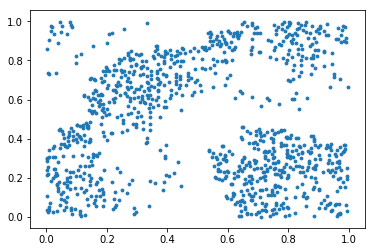

In [3]:
orbits1 = scio.loadmat('./data/dynamic2d/orbits1')['orbits1']
plt.scatter(orbits1[:1000][:, 0], orbits1[:1000][:, 1], s=8)

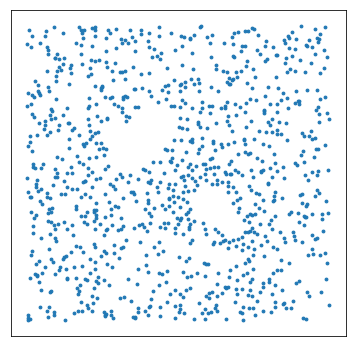

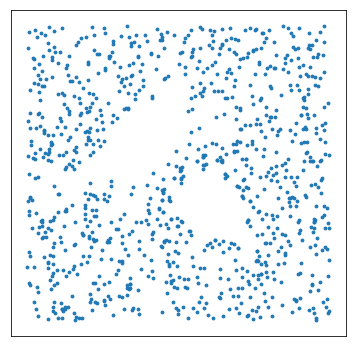

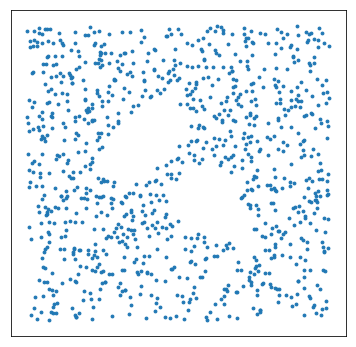

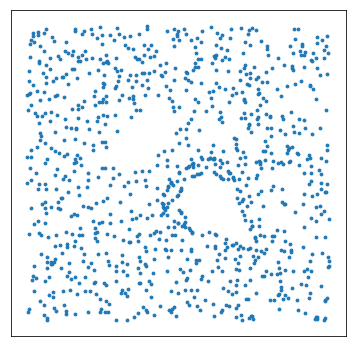

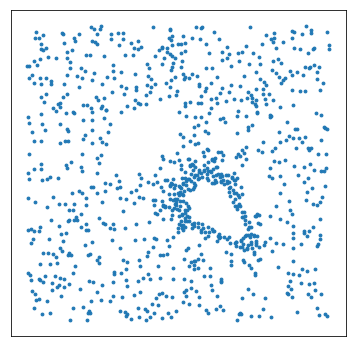

In [4]:
orbits5 = scio.loadmat('./data/dynamic2d/orbits5')['orbits5']
for i in range(0, 5):
    #plt.subplot(5, 1, i+1)
    plt.figure(figsize=(6,6)) 
    plt.xticks([])
    plt.yticks([])
    plt.scatter(orbits5[1000 * i:1000 * i + 1000][:, 0], orbits5[1000 * i:1000 * i + 1000][:, 1], s=8)
    plt.show()

In [5]:
orbits1 = scio.loadmat('./data/dynamic2d/orbits1')['orbits1']
orbits2 = scio.loadmat('./data/dynamic2d/orbits2')['orbits2']
orbits3 = scio.loadmat('./data/dynamic2d/orbits3')['orbits3']
orbits4 = scio.loadmat('./data/dynamic2d/orbits4')['orbits4']
orbits5 = scio.loadmat('./data/dynamic2d/orbits5')['orbits5']
orbits = [orbits1, orbits2, orbits3, orbits4, orbits5]

In [6]:
import numpy as np
from ripser import Rips
from persim import PersImage
import os

In [7]:
orbits[0]

array([[0.51251769, 0.6452256 ],
       [0.97033674, 0.7027923 ],
       [0.38808731, 0.1777434 ],
       ...,
       [0.85698828, 0.28097978],
       [0.26104857, 0.66678421],
       [0.70541462, 0.08239387]])

In [8]:
os.mkdir('./PD_dynamic2d')

rips = Rips()
for i, orbit in enumerate(orbits):
    orbit_ = []
    for j in range(50):
        orbit_.append(orbit[1000*j:1000*j+1000, :])
    orbit_ = np.array(orbit_)
     
    for j in range(50):
        data = orbit_[j]
        dgm = rips.fit_transform(data)
        
        np.savetxt('./PD_dynamic2d/{}_{}_{}.txt'.format(0, i, j), np.array(dgm[0]), fmt='%s')
        np.savetxt('./PD_dynamic2d/{}_{}_{}.txt'.format(1, i, j), np.array(dgm[1]), fmt='%s')

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, verbose=True)


In [9]:
# normalization

import glob
import numpy as np

pd_files = glob.glob('./PD_dynamic2d/*.txt')

pd_files = sorted(pd_files)

# H0 normalization
max_h0 = 0
for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[i])[:-1]  # disgarding inf 
    if np.max(data) > max_h0:
        max_h0 = np.max(data)


for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[i])[:-1]  # disgarding inf  
    data = data / max_h0 
    np.savetxt('./PD_dynamic2d/' + pd_files[i].split('/')[-1], data, fmt='%s')

# H1 normalization
max_h1 = 0
for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[len(pd_files)//2 + i])
    try:
        data[:, 1] = data[:, 1] - data[:, 0]
    except:
        data = data.reshape((1, 2))
        data[:, 1] = data[:, 1] - data[:, 0]
    if np.max(data) > max_h1:
        max_h1 = np.max(data)
        

for i in range(len(pd_files)//2):
    data = np.loadtxt(pd_files[len(pd_files)//2 + i]) 
    try:
        data[:, 1] = data[:, 1] - data[:, 0]
    except:
        data = data.reshape((1, 2))
        data[:, 1] = data[:, 1] - data[:, 0]
    data = data / max_h1  
    np.savetxt('./PD_dynamic2d/' + pd_files[len(pd_files)//2 + i].split('/')[-1], data, fmt='%s')        